In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
def read_rsem_files(directory_path, nr_of_patients):
    rsem_data = {}
    for file in os.listdir(directory_path):
        if file.endswith('.genes.results'):
            patient_id, _ , _ = file.split('_')
            rsem_data[patient_id] = pd.read_csv(os.path.join(directory_path, file), sep = '\t')
    return rsem_data
        

In [4]:
directory_path = '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/NZM'
rsem_data = read_rsem_files(directory_path, 10)

In [5]:
rsem_s1 = rsem_data['1']
rsem_s2 = rsem_data['2']
rsem_s3 = rsem_data['3']
rsem_s4 = rsem_data['4']
rsem_s5 = rsem_data['5']
rsem_s6 = rsem_data['6']
rsem_s7 = rsem_data['7']
rsem_s8 = rsem_data['8']
rsem_s9 = rsem_data['9']



MAKE OVEREXPRESSED ERV's HEATMAP

In [6]:
file = open('NZM_ERV_names.txt')

overexpressed_ERVs = file.read() 
overexpressed_ERVs_list = overexpressed_ERVs.split('\n')[:-1]

In [7]:
rsem_m1_overexpr = rsem_s1[rsem_s1['gene_id'].isin(overexpressed_ERVs_list)]
rsem_m2_overexpr = rsem_s2[rsem_s2['gene_id'].isin(overexpressed_ERVs_list)]
rsem_m3_overexpr = rsem_s3[rsem_s3['gene_id'].isin(overexpressed_ERVs_list)]
rsem_m4_overexpr = rsem_s4[rsem_s4['gene_id'].isin(overexpressed_ERVs_list)]
rsem_m5_overexpr = rsem_s5[rsem_s5['gene_id'].isin(overexpressed_ERVs_list)]
rsem_m6_overexpr = rsem_s6[rsem_s6['gene_id'].isin(overexpressed_ERVs_list)]
rsem_m7_overexpr = rsem_s7[rsem_s7['gene_id'].isin(overexpressed_ERVs_list)]
rsem_m8_overexpr = rsem_s8[rsem_s8['gene_id'].isin(overexpressed_ERVs_list)]
rsem_m9_overexpr = rsem_s9[rsem_s9['gene_id'].isin(overexpressed_ERVs_list)]

In [8]:

mouse_list = [rsem_m1_overexpr, rsem_m2_overexpr, rsem_m3_overexpr, rsem_m4_overexpr, rsem_m5_overexpr,rsem_m6_overexpr,rsem_m7_overexpr,rsem_m8_overexpr,rsem_m9_overexpr]
#columns_to_drop = ['transcript_id(s)', 'length', 'effective_length', 'TPM', 'FPKM']
columns_to_drop = ['transcript_id(s)', 'length', 'effective_length', 'expected_count', 'FPKM']

ctr = 1
full_df = pd.DataFrame()

for mouse in mouse_list:
    mouse = mouse.copy()
    mouse['patient_id'] = ctr
    mouse.drop(columns=columns_to_drop, inplace=True)
    #print(mouse)
    full_df = pd.concat([full_df, mouse], ignore_index=True)
    ctr += 1

print(full_df)

                                gene_id   TPM  patient_id
0    Hsap38.chr12.127155087.127155659.+  0.11           1
1    Hsap38.chr12.127155953.127156498.+  0.23           1
2      Hsap38.chr12.65550104.65551864.-  0.03           1
3    Hsap38.chr14.101268159.101272007.+  0.01           1
4      Hsap38.chr16.35519171.35519536.+  0.00           1
..                                  ...   ...         ...
256       Hsap38.chr7.4593656.4596523.-  0.00           9
257       Hsap38.chr7.4597292.4598194.-  1.13           9
258       Hsap38.chr7.4598198.4599559.-  3.57           9
259     Hsap38.chr8.29762415.29763893.+  0.97           9
260   Hsap38.chr9.106608616.106609743.+  0.21           9

[261 rows x 3 columns]


In [10]:
#apply log transformation to the TPM vlaues. 
full_df['TPM_log'] = np.log1p(full_df['TPM'])

In [11]:
def extract_chrom(df):
    pattern = r"^Hsap38\.(chr[^.]+)\."
    df['chrom'] = df['gene_id'].str.extract(pattern)
    return df
    
def extract_start_pos(df):
    pattern = r"^Hsap38\.[^.]+\.([^.]+)\."
    df['start'] = df['gene_id'].str.extract(pattern)
    df.astype({'start': 'int32'}).dtypes
    return df

In [12]:
full_df = extract_chrom(full_df)
full_df = extract_start_pos(full_df)
print(full_df)

                                gene_id   TPM  patient_id   TPM_log  chrom  \
0    Hsap38.chr12.127155087.127155659.+  0.11           1  0.104360  chr12   
1    Hsap38.chr12.127155953.127156498.+  0.23           1  0.207014  chr12   
2      Hsap38.chr12.65550104.65551864.-  0.03           1  0.029559  chr12   
3    Hsap38.chr14.101268159.101272007.+  0.01           1  0.009950  chr14   
4      Hsap38.chr16.35519171.35519536.+  0.00           1  0.000000  chr16   
..                                  ...   ...         ...       ...    ...   
256       Hsap38.chr7.4593656.4596523.-  0.00           9  0.000000   chr7   
257       Hsap38.chr7.4597292.4598194.-  1.13           9  0.756122   chr7   
258       Hsap38.chr7.4598198.4599559.-  3.57           9  1.519513   chr7   
259     Hsap38.chr8.29762415.29763893.+  0.97           9  0.678034   chr8   
260   Hsap38.chr9.106608616.106609743.+  0.21           9  0.190620   chr9   

         start  
0    127155087  
1    127155953  
2     655501

In [17]:
#make separate dataframe for patients
pat_1 = full_df[full_df['patient_id'] == 1]
pat_2 = full_df[full_df['patient_id'] == 2]
pat_3 = full_df[full_df['patient_id'] == 3]
pat_4 = full_df[full_df['patient_id'] == 4]
pat_5 = full_df[full_df['patient_id'] == 5]
pat_6 = full_df[full_df['patient_id'] == 6]
pat_7 = full_df[full_df['patient_id'] == 7]
pat_8 = full_df[full_df['patient_id'] == 8]
pat_9 = full_df[full_df['patient_id'] == 9]

In [29]:
rows = list(full_df['gene_id'].unique())
columns = list(full_df['chrom'].unique())

In [30]:
#make an empty df of a required dimensions
heatmap = pd.DataFrame(np.zeros((len(rows), len(columns))), index=rows, columns=columns)

In [31]:
inv1_merged = pd.merge(pat_1, pat_2, on = ['gene_id'], suffixes = ['_inv1', '_inv2'])
inv2_merged = pd.merge(pat_3, pat_6, on = ['gene_id'], suffixes = ['_inv3', '_inv4'])
inv3_merged = pd.merge(inv2_merged, pat_7, on = ['gene_id'])
inv_full = pd.merge(inv3_merged, inv1_merged, on = ['gene_id'])

ninv1_merged = pd.merge(pat_4, pat_5, on = ['gene_id'], suffixes = ['_ninv1', '_ninv2'])
ninv2_merged = pd.merge(pat_8, pat_9, on = ['gene_id'], suffixes = ['_ninv3', '_ninv4'])
ninv_full = pd.merge(ninv2_merged, ninv1_merged, on = ['gene_id'])

full_df = pd.merge(inv_full, ninv_full, on = ['gene_id'])


In [32]:
#NINV minus INV
full_df['TPM_diff_log'] = (full_df['TPM_log_ninv1']+ full_df['TPM_log_ninv2'] +
                           full_df['TPM_log_ninv3'] + full_df['TPM_log_ninv4'])/4 - (full_df['TPM_log_inv1'] + full_df['TPM_log_inv2']
                           + full_df['TPM_log_inv3'] +full_df['TPM_log_inv4']
                          + full_df['TPM_log'])/5 

In [33]:
full_df_small = full_df[['gene_id', 'chrom', 'TPM_diff_log']]

In [34]:
#fill the heatmap df with values
for index, row in full_df_small.iterrows():
    heatmap.loc[row['gene_id'], row['chrom']] = row['TPM_diff_log']

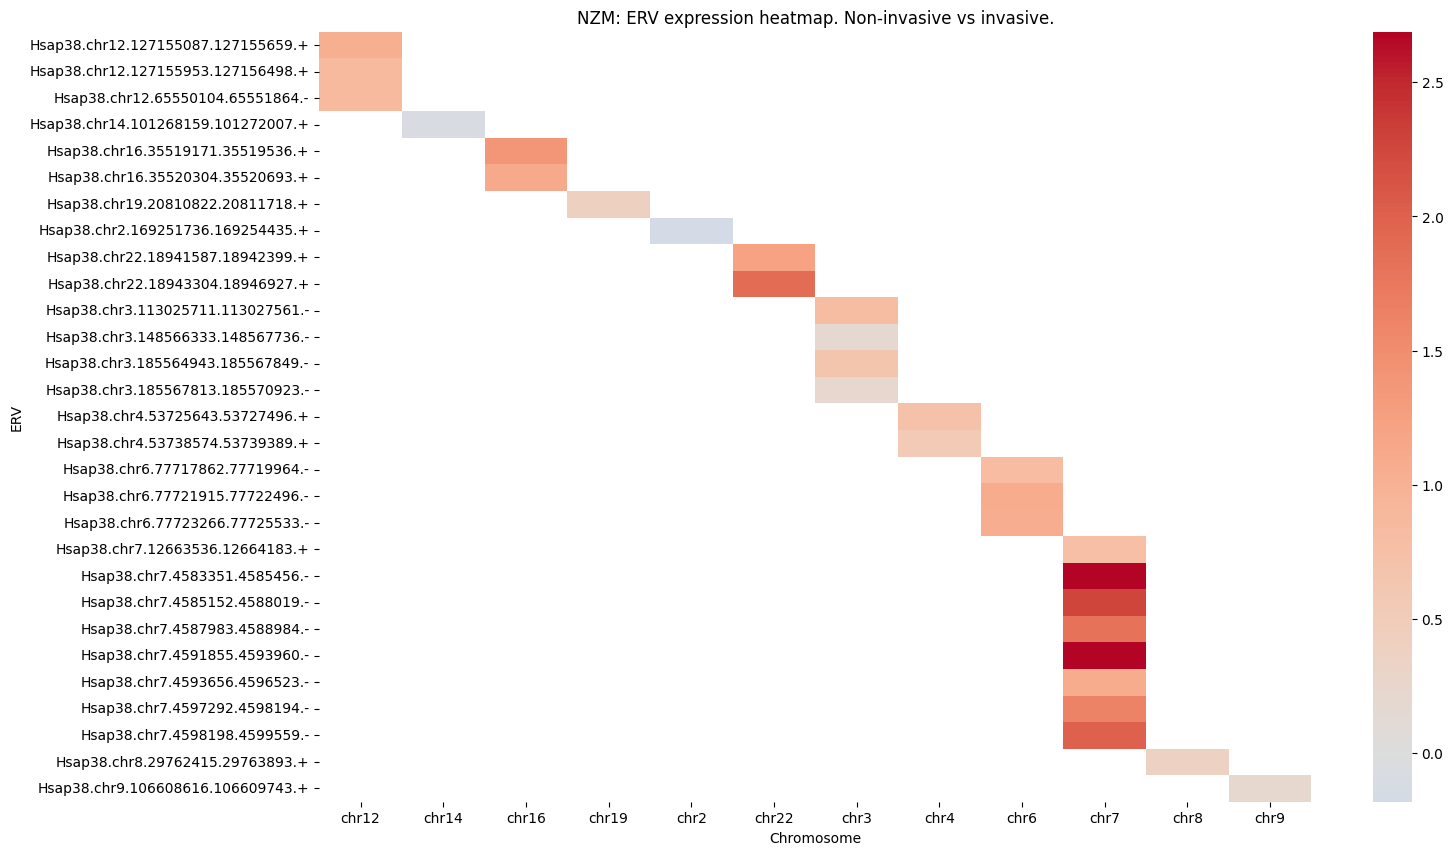

In [42]:
#TRY TO PERFORM GROUPING BASED ON FAMITLY ID !!
#FIRST LOG TRANSFORM THEN DIFFERENCE - can't do the other way around, because i cant log the negative numbers
#mask = heatmap_full != 0
# Mask to hide zero values
mask = heatmap != 0

# Increase the figure size
plt.figure(figsize=(16, 10))

# Plot heatmap using seaborn
sns.heatmap(heatmap, cmap='coolwarm', mask=~mask, center=0)

# Add title and labels
plt.title('NZM: ERV expression heatmap. Non-invasive vs invasive.')
plt.xlabel('Chromosome')
plt.ylabel('ERV')

# Save plot with a tight layout to prevent cutoff
plt.savefig('NZM_heatmap.jpg', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


In [20]:
from PIL import Image

def merge_images(image_files, output_filename, subplots_per_row):
    images = [Image.open(img) for img in image_files]
    widths, heights = zip(*(img.size for img in images))

    # Calculate the dimensions of the grid
    num_images = len(images)
    rows = (num_images - 1) // subplots_per_row + 1

    # Calculate the total width and height of the merged image
    max_width = max(widths) * subplots_per_row
    total_height = sum(heights[i] for i in range(0, num_images, subplots_per_row))

    new_image = Image.new('RGB', (max_width, total_height), color=(255, 255, 255))

    y_offset = 0
    for row in range(0, num_images, subplots_per_row):
        max_height_in_row = max(heights[row:row+subplots_per_row])
        x_offset = 0
        for img in images[row:row+subplots_per_row]:
            new_image.paste(img, (x_offset, y_offset))
            x_offset += img.size[0]
        y_offset += max_height_in_row

    new_image.save(output_filename)

def visualise_ERV_expression_gropus_3(df, filename, threshold=True, split_by_chrom=False, subplots_per_row=3):
    palette = {1: 'red', 2: 'red', 3: 'red', 4: 'blue',5:'blue', 6:'red', 7:'red', 8:'blue',9:'blue'}

    if split_by_chrom:
        # Group data by chromosome
        chrom_groups = df.groupby('chrom')
        num_chroms = len(chrom_groups)

        image_files = []

        for chrom, group in chrom_groups:
            # Sort the group by ascending order of 'start' position
            group['start'] = group['start'].astype(int)

            group_sorted = group.sort_values(by='start')
            print(group_sorted)
            fig, ax = plt.subplots(figsize=(15, 10))
            sns.barplot(data=group_sorted, x='gene_id', y='TPM', hue='patient_id', palette=palette, ax=ax)
            ax.set_title(f'Chromosome {chrom}')
            ax.set_xlabel('ERV id')
            ax.set_ylabel('TPM')
            ax.legend(title='Cell ID', loc='upper right')
            if threshold:
                ax.set_xticklabels(ax.get_xticklabels(), rotation=10)

            # Save each subplot individually
            img_filename = f'{filename}_{chrom}.png'
            plt.savefig(img_filename)
            plt.close()  # Close the current figure to prevent memory issues
            
            image_files.append(img_filename)

        # Merge the saved images into a single grid
        merge_images(image_files, f'{filename}_merged.png', subplots_per_row)

        # Remove individual subplot images
        for img_file in image_files:
            os.remove(img_file)

    else:    
        sns.barplot(data=df, x='gene_id', y='TPM', hue='patient_id', palette=palette)
        plt.xlabel('ERV id')
        plt.ylabel('Count')
        plt.title('ERV expression levels measured with RSEM')
        plt.legend(title='Cell ID', loc='upper right')
        if threshold:
            plt.xticks(rotation=90)
        plt.savefig(filename)
        plt.show()


In [21]:
visualise_ERV_expression_gropus_3(full_df, 'NZM_diffexp_ERV', split_by_chrom = True)

                                gene_id   TPM  patient_id  chrom      start
2      Hsap38.chr12.65550104.65551864.-  0.03           1  chr12   65550104
31     Hsap38.chr12.65550104.65551864.-  0.27           2  chr12   65550104
89     Hsap38.chr12.65550104.65551864.-  0.00           4  chr12   65550104
60     Hsap38.chr12.65550104.65551864.-  0.00           3  chr12   65550104
118    Hsap38.chr12.65550104.65551864.-  3.08           5  chr12   65550104
205    Hsap38.chr12.65550104.65551864.-  1.59           8  chr12   65550104
176    Hsap38.chr12.65550104.65551864.-  0.03           7  chr12   65550104
147    Hsap38.chr12.65550104.65551864.-  0.00           6  chr12   65550104
234    Hsap38.chr12.65550104.65551864.-  2.71           9  chr12   65550104
116  Hsap38.chr12.127155087.127155659.+  0.00           5  chr12  127155087
87   Hsap38.chr12.127155087.127155659.+  9.14           4  chr12  127155087
203  Hsap38.chr12.127155087.127155659.+  1.09           8  chr12  127155087
145  Hsap38.

/tmp/ipykernel_1012463/4178648298.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)


                                gene_id   TPM  patient_id  chrom      start
3    Hsap38.chr14.101268159.101272007.+  0.01           1  chr14  101268159
32   Hsap38.chr14.101268159.101272007.+  0.30           2  chr14  101268159
61   Hsap38.chr14.101268159.101272007.+  0.03           3  chr14  101268159
90   Hsap38.chr14.101268159.101272007.+  0.00           4  chr14  101268159
119  Hsap38.chr14.101268159.101272007.+  0.00           5  chr14  101268159
148  Hsap38.chr14.101268159.101272007.+  0.02           6  chr14  101268159
177  Hsap38.chr14.101268159.101272007.+  0.22           7  chr14  101268159
206  Hsap38.chr14.101268159.101272007.+  0.01           8  chr14  101268159
235  Hsap38.chr14.101268159.101272007.+  0.01           9  chr14  101268159


/tmp/ipykernel_1012463/4178648298.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)


                              gene_id    TPM  patient_id  chrom     start
4    Hsap38.chr16.35519171.35519536.+   0.00           1  chr16  35519171
33   Hsap38.chr16.35519171.35519536.+   0.00           2  chr16  35519171
91   Hsap38.chr16.35519171.35519536.+   7.07           4  chr16  35519171
62   Hsap38.chr16.35519171.35519536.+   0.00           3  chr16  35519171
178  Hsap38.chr16.35519171.35519536.+   0.23           7  chr16  35519171
207  Hsap38.chr16.35519171.35519536.+   3.08           8  chr16  35519171
149  Hsap38.chr16.35519171.35519536.+   0.00           6  chr16  35519171
120  Hsap38.chr16.35519171.35519536.+   0.73           5  chr16  35519171
236  Hsap38.chr16.35519171.35519536.+   4.49           9  chr16  35519171
92   Hsap38.chr16.35520304.35520693.+  12.49           4  chr16  35520304
5    Hsap38.chr16.35520304.35520693.+   0.19           1  chr16  35520304
63   Hsap38.chr16.35520304.35520693.+   0.75           3  chr16  35520304
150  Hsap38.chr16.35520304.35520693.+ 

/tmp/ipykernel_1012463/4178648298.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)


                              gene_id   TPM  patient_id  chrom     start
6    Hsap38.chr19.20810822.20811718.+  0.00           1  chr19  20810822
35   Hsap38.chr19.20810822.20811718.+  0.00           2  chr19  20810822
64   Hsap38.chr19.20810822.20811718.+  0.06           3  chr19  20810822
93   Hsap38.chr19.20810822.20811718.+  0.60           4  chr19  20810822
122  Hsap38.chr19.20810822.20811718.+  1.05           5  chr19  20810822
151  Hsap38.chr19.20810822.20811718.+  0.00           6  chr19  20810822
180  Hsap38.chr19.20810822.20811718.+  0.06           7  chr19  20810822
209  Hsap38.chr19.20810822.20811718.+  0.05           8  chr19  20810822
238  Hsap38.chr19.20810822.20811718.+  0.60           9  chr19  20810822


/tmp/ipykernel_1012463/4178648298.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)


                               gene_id   TPM  patient_id chrom      start
7    Hsap38.chr2.169251736.169254435.+  0.38           1  chr2  169251736
36   Hsap38.chr2.169251736.169254435.+  0.39           2  chr2  169251736
65   Hsap38.chr2.169251736.169254435.+  0.08           3  chr2  169251736
94   Hsap38.chr2.169251736.169254435.+  0.00           4  chr2  169251736
123  Hsap38.chr2.169251736.169254435.+  0.00           5  chr2  169251736
152  Hsap38.chr2.169251736.169254435.+  0.00           6  chr2  169251736
181  Hsap38.chr2.169251736.169254435.+  0.25           7  chr2  169251736
210  Hsap38.chr2.169251736.169254435.+  0.02           8  chr2  169251736
239  Hsap38.chr2.169251736.169254435.+  0.02           9  chr2  169251736


/tmp/ipykernel_1012463/4178648298.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)


                              gene_id     TPM  patient_id  chrom     start
8    Hsap38.chr22.18941587.18942399.+    0.00           1  chr22  18941587
37   Hsap38.chr22.18941587.18942399.+    0.00           2  chr22  18941587
95   Hsap38.chr22.18941587.18942399.+    3.43           4  chr22  18941587
66   Hsap38.chr22.18941587.18942399.+    0.00           3  chr22  18941587
182  Hsap38.chr22.18941587.18942399.+    0.00           7  chr22  18941587
211  Hsap38.chr22.18941587.18942399.+   28.85           8  chr22  18941587
153  Hsap38.chr22.18941587.18942399.+    0.00           6  chr22  18941587
124  Hsap38.chr22.18941587.18942399.+    0.00           5  chr22  18941587
240  Hsap38.chr22.18941587.18942399.+    0.00           9  chr22  18941587
96   Hsap38.chr22.18943304.18946927.+   14.20           4  chr22  18943304
9    Hsap38.chr22.18943304.18946927.+    0.00           1  chr22  18943304
67   Hsap38.chr22.18943304.18946927.+    0.00           3  chr22  18943304
154  Hsap38.chr22.1894330

/tmp/ipykernel_1012463/4178648298.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)


                               gene_id   TPM  patient_id chrom      start
10   Hsap38.chr3.113025711.113027561.-  0.00           1  chr3  113025711
39   Hsap38.chr3.113025711.113027561.-  0.00           2  chr3  113025711
97   Hsap38.chr3.113025711.113027561.-  1.58           4  chr3  113025711
68   Hsap38.chr3.113025711.113027561.-  0.04           3  chr3  113025711
184  Hsap38.chr3.113025711.113027561.-  0.00           7  chr3  113025711
213  Hsap38.chr3.113025711.113027561.-  8.88           8  chr3  113025711
155  Hsap38.chr3.113025711.113027561.-  0.00           6  chr3  113025711
126  Hsap38.chr3.113025711.113027561.-  0.00           5  chr3  113025711
242  Hsap38.chr3.113025711.113027561.-  0.00           9  chr3  113025711
127  Hsap38.chr3.148566333.148567736.-  0.06           5  chr3  148566333
214  Hsap38.chr3.148566333.148567736.-  0.52           8  chr3  148566333
156  Hsap38.chr3.148566333.148567736.-  0.00           6  chr3  148566333
69   Hsap38.chr3.148566333.148567736.-

/tmp/ipykernel_1012463/4178648298.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)


                             gene_id   TPM  patient_id chrom     start
14   Hsap38.chr4.53725643.53727496.+  0.00           1  chr4  53725643
43   Hsap38.chr4.53725643.53727496.+  0.00           2  chr4  53725643
101  Hsap38.chr4.53725643.53727496.+  0.02           4  chr4  53725643
72   Hsap38.chr4.53725643.53727496.+  0.00           3  chr4  53725643
188  Hsap38.chr4.53725643.53727496.+  0.09           7  chr4  53725643
217  Hsap38.chr4.53725643.53727496.+  0.40           8  chr4  53725643
159  Hsap38.chr4.53725643.53727496.+  0.00           6  chr4  53725643
130  Hsap38.chr4.53725643.53727496.+  1.99           5  chr4  53725643
246  Hsap38.chr4.53725643.53727496.+  3.64           9  chr4  53725643
102  Hsap38.chr4.53738574.53739389.+  0.15           4  chr4  53738574
15   Hsap38.chr4.53738574.53739389.+  0.00           1  chr4  53738574
73   Hsap38.chr4.53738574.53739389.+  0.11           3  chr4  53738574
160  Hsap38.chr4.53738574.53739389.+  0.00           6  chr4  53738574
131  H

/tmp/ipykernel_1012463/4178648298.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)


                             gene_id    TPM  patient_id chrom     start
16   Hsap38.chr6.77717862.77719964.-   0.00           1  chr6  77717862
45   Hsap38.chr6.77717862.77719964.-   0.00           2  chr6  77717862
74   Hsap38.chr6.77717862.77719964.-   0.00           3  chr6  77717862
103  Hsap38.chr6.77717862.77719964.-   1.12           4  chr6  77717862
132  Hsap38.chr6.77717862.77719964.-   0.00           5  chr6  77717862
161  Hsap38.chr6.77717862.77719964.-   0.00           6  chr6  77717862
219  Hsap38.chr6.77717862.77719964.-  11.11           8  chr6  77717862
190  Hsap38.chr6.77717862.77719964.-   0.00           7  chr6  77717862
248  Hsap38.chr6.77717862.77719964.-   0.05           9  chr6  77717862
133  Hsap38.chr6.77721915.77722496.-   0.00           5  chr6  77721915
46   Hsap38.chr6.77721915.77722496.-   0.00           2  chr6  77721915
220  Hsap38.chr6.77721915.77722496.-  17.18           8  chr6  77721915
191  Hsap38.chr6.77721915.77722496.-   0.00           7  chr6  7

/tmp/ipykernel_1012463/4178648298.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)


                             gene_id     TPM  patient_id chrom     start
49     Hsap38.chr7.4583351.4585456.-    0.22           2  chr7   4583351
223    Hsap38.chr7.4583351.4585456.-  177.89           8  chr7   4583351
78     Hsap38.chr7.4583351.4585456.-    0.04           3  chr7   4583351
107    Hsap38.chr7.4583351.4585456.-  106.57           4  chr7   4583351
136    Hsap38.chr7.4583351.4585456.-    0.00           5  chr7   4583351
..                               ...     ...         ...   ...       ...
135  Hsap38.chr7.12663536.12664183.+    1.59           5  chr7  12663536
106  Hsap38.chr7.12663536.12664183.+    0.00           4  chr7  12663536
77   Hsap38.chr7.12663536.12664183.+    0.00           3  chr7  12663536
222  Hsap38.chr7.12663536.12664183.+    0.14           8  chr7  12663536
48   Hsap38.chr7.12663536.12664183.+    0.00           2  chr7  12663536

[72 rows x 5 columns]


/tmp/ipykernel_1012463/4178648298.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)


                             gene_id   TPM  patient_id chrom     start
27   Hsap38.chr8.29762415.29763893.+  0.00           1  chr8  29762415
56   Hsap38.chr8.29762415.29763893.+  0.00           2  chr8  29762415
85   Hsap38.chr8.29762415.29763893.+  0.11           3  chr8  29762415
114  Hsap38.chr8.29762415.29763893.+  0.44           4  chr8  29762415
143  Hsap38.chr8.29762415.29763893.+  0.52           5  chr8  29762415
172  Hsap38.chr8.29762415.29763893.+  0.00           6  chr8  29762415
201  Hsap38.chr8.29762415.29763893.+  0.00           7  chr8  29762415
230  Hsap38.chr8.29762415.29763893.+  0.10           8  chr8  29762415
259  Hsap38.chr8.29762415.29763893.+  0.97           9  chr8  29762415


/tmp/ipykernel_1012463/4178648298.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)


                               gene_id   TPM  patient_id chrom      start
28   Hsap38.chr9.106608616.106609743.+  0.05           1  chr9  106608616
57   Hsap38.chr9.106608616.106609743.+  0.00           2  chr9  106608616
86   Hsap38.chr9.106608616.106609743.+  0.00           3  chr9  106608616
115  Hsap38.chr9.106608616.106609743.+  0.67           4  chr9  106608616
144  Hsap38.chr9.106608616.106609743.+  0.04           5  chr9  106608616
173  Hsap38.chr9.106608616.106609743.+  0.00           6  chr9  106608616
202  Hsap38.chr9.106608616.106609743.+  0.00           7  chr9  106608616
231  Hsap38.chr9.106608616.106609743.+  0.14           8  chr9  106608616
260  Hsap38.chr9.106608616.106609743.+  0.21           9  chr9  106608616


/tmp/ipykernel_1012463/4178648298.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)


SEE HOW MANY DIFFERENTIALLY EXPRESSED ERV'S OVERLAP BETWEEN NZM AND DNMT1 DATASETS

In [23]:
file = open('NZM_ERV_names.txt')

overexpressed_ERVs_NZM = file.read() 
overexpressed_ERVs_list_NZM = overexpressed_ERVs_NZM.split('\n')[:-1]

In [24]:
file = open('ERV_names.txt')

overexpressed_ERVs_DNMT1 = file.read() 
overexpressed_ERVs_list_DNMT1 = overexpressed_ERVs_DNMT1.split('\n')[:-1]

In [26]:
shared_ERVS = list(set(overexpressed_ERVs_list_NZM) & set(overexpressed_ERVs_list_DNMT1))
print(shared_ERVS)

['Hsap38.chr12.127155087.127155659.+', 'Hsap38.chr12.127155953.127156498.+', 'Hsap38.chr12.65550104.65551864.-', 'Hsap38.chr14.101268159.101272007.+', 'Hsap38.chr16.35519171.35519536.+', 'Hsap38.chr16.35520304.35520693.+', 'Hsap38.chr19.20810822.20811718.+', 'Hsap38.chr2.169251736.169254435.+', 'Hsap38.chr22.18941587.18942399.+', 'Hsap38.chr22.18943304.18946927.+', 'Hsap38.chr3.113025711.113027561.-', 'Hsap38.chr3.148566333.148567736.-', 'Hsap38.chr3.185564943.185567849.-', 'Hsap38.chr3.185567813.185570923.-', 'Hsap38.chr4.53725643.53727496.+', 'Hsap38.chr4.53738574.53739389.+', 'Hsap38.chr6.77717862.77719964.-', 'Hsap38.chr6.77721915.77722496.-', 'Hsap38.chr6.77723266.77725533.-', 'Hsap38.chr7.12663536.12664183.+', 'Hsap38.chr7.4583351.4585456.-', 'Hsap38.chr7.4585152.4588019.-', 'Hsap38.chr7.4587983.4588984.-', 'Hsap38.chr7.4591855.4593960.-', 'Hsap38.chr7.4593656.4596523.-', 'Hsap38.chr7.4597292.4598194.-', 'Hsap38.chr7.4598198.4599559.-', 'Hsap38.chr8.29762415.29763893.+', 'Hsap38.

In [4]:
#filter out non-erv expression data
for patient in rsem_data:
    df = rsem_data[patient]
    df = df[df['gene_id'].str.startswith('Hsap38')]
    rsem_data[patient] = df  # Update the DataFrame in the dictionary



In [5]:
def count_breadth(expression_df):
    breadth = len(expression_df[expression_df['TPM'] > 1] )    
    return breadth

def count_abundance(expression_df):
    abundance = expression_df['TPM'].sum()
    return abundance

In [6]:
ERV_exp_metrics = {}

for patient, df in rsem_data.items():
    breadth = count_breadth(df)
    abundance = count_abundance(df)
    print('{} : breadth : {} abundance {}'.format(patient, breadth, abundance))
    ERV_exp_metrics[patient] = [breadth, abundance]

7 : breadth : 149 abundance 1102.8999999999999
10 : breadth : 102 abundance 555.55
6 : breadth : 24 abundance 359.22
1 : breadth : 49 abundance 370.79
4 : breadth : 80 abundance 907.0400000000001
5 : breadth : 60 abundance 497.3500000000001
9 : breadth : 114 abundance 677.26
8 : breadth : 84 abundance 1431.07
2 : breadth : 107 abundance 711.3199999999999
3 : breadth : 179 abundance 1147.08


In [7]:
#map with phenotype
patient2phenotype = {
    '1' : 'invasive',
    '2' : 'invasive', 
    '3' : 'invasive',
    '4' : 'non-invasive',
    '5' : 'non-invasive',
    '6' : 'invasive',
    '7' : 'invasive',
    '8' : 'non-invasive',
    '9' : 'non-invasive',
    '10' : 'normal'
}

patient2cellline = {
    '1' : 'NZM6',
    '2' : 'NZM9',
    '3' : 'NZM11',
    '4' : 'NZM12',
    '5' : 'NZM15',
    '6' : 'NZM22',
    '7' : 'NZM40',
    '8' : 'NZM42',
    '9' : 'Skmel28',
    '10' : 'HemNLP',

}

In [8]:
def get_metrics_phenotype(df, patient_2_phenotype):
    for patient in df.keys():
        df[patient].append(patient2phenotype[patient])        
        print('{} : breadth : {} abundance {} phenotype {}'.format(str(patient), df[patient][0] , df[patient][1], df[patient][2]))

    
    return df

In [9]:
ERV_exp_metrics = get_metrics_phenotype(ERV_exp_metrics, patient2phenotype)



7 : breadth : 149 abundance 1102.8999999999999 phenotype invasive
10 : breadth : 102 abundance 555.55 phenotype normal
6 : breadth : 24 abundance 359.22 phenotype invasive
1 : breadth : 49 abundance 370.79 phenotype invasive
4 : breadth : 80 abundance 907.0400000000001 phenotype non-invasive
5 : breadth : 60 abundance 497.3500000000001 phenotype non-invasive
9 : breadth : 114 abundance 677.26 phenotype non-invasive
8 : breadth : 84 abundance 1431.07 phenotype non-invasive
2 : breadth : 107 abundance 711.3199999999999 phenotype invasive
3 : breadth : 179 abundance 1147.08 phenotype invasive


TEcounts part

In [10]:
def get_TEtranscript_path(directory_path, subfolder):
    subfolder_path = os.path.join(directory_path, subfolder)
    files = os.listdir(subfolder_path)
    if len(files) != 1:
        return 0
    return os.path.join(subfolder_path, files[0])
    
def modify_columns(columns, patient_id):
    modified_columns = [col + '_' + patient_id for col in columns]
    return modified_columns

def consolidate_gene_id_columns(df):
    gene_id_columns = [col for col in df.columns if col.startswith('gene_id_')]
    if gene_id_columns:
        df['gene_id'] = df[gene_id_columns[0]]
        df.drop(gene_id_columns, axis=1, inplace=True)
    return df

    
def load_TEtranscript_data(directory_path):
    columns = ['gene_id', 'count']
    TEtranscript_data = {}
    for subfolder in os.listdir(directory_path):
        patient_id, _ = subfolder.split('_')
        TE_file_path = get_TEtranscript_path(directory_path, subfolder)
        if TE_file_path == 0:
            print('couldn \'t load the TEfile')
            return 0
        TEtranscript_data[patient_id] = pd.read_csv(TE_file_path, sep='\t', header=0, names=modify_columns(columns, patient_id))
    return TEtranscript_data

# Example usage:
directory_path = '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_TEcount/NZM/'

TEtranscript_data = load_TEtranscript_data(directory_path)
print(TEtranscript_data['1'])

                        gene_id_1  count_1
0                 ENSG00000000003       15
1                 ENSG00000000005        0
2                 ENSG00000000419       99
3                 ENSG00000000457       15
4                 ENSG00000000460       16
...                           ...      ...
95805      Zaphod2:hAT-Tip100:DNA        0
95806      Zaphod3:hAT-Tip100:DNA        2
95807       Zaphod:hAT-Tip100:DNA        7
95808  hAT-16_Crp:hAT-Charlie:DNA        0
95809   hAT-N1_Mam:hAT-Tip100:DNA        1

[95810 rows x 2 columns]


In [11]:
def add_phenotype(df_dict):
    patient_dfs = list(df_dict.values())
    for df in patient_dfs:
        df['phenotype' + '_' + patient ] = patient2phenotype[patient]
    return df_dict

TEtranscript_data = add_phenotype(TEtranscript_data)    

In [12]:
def concatenate_patient_dataframes(TEtranscript_data):
    patient_dfs = list(TEtranscript_data.values())
    #print(patient_dfs)
    #print(TEtranscript_data.values())
    concatenated_df = pd.concat(patient_dfs, axis=1) if patient_dfs else None
    concatenated_df = consolidate_gene_id_columns(concatenated_df)
    return concatenated_df

In [13]:
NZM_TE_df = concatenate_patient_dataframes(TEtranscript_data)
print(NZM_TE_df.shape)
print(NZM_TE_df.head())

(95810, 21)
   count_7  phenotype_3  count_8  phenotype_3  count_1  phenotype_3  count_10  \
0       34     invasive       30     invasive       15     invasive        12   
1        0     invasive        0     invasive        0     invasive         0   
2       41     invasive       39     invasive       99     invasive        16   
3        8     invasive       20     invasive       15     invasive        17   
4       12     invasive        9     invasive       16     invasive        16   

   phenotype_3  count_3  phenotype_3  ...  phenotype_3 count_5  phenotype_3  \
0     invasive       28     invasive  ...     invasive      18     invasive   
1     invasive        0     invasive  ...     invasive       0     invasive   
2     invasive       39     invasive  ...     invasive      22     invasive   
3     invasive       13     invasive  ...     invasive      17     invasive   
4     invasive        4     invasive  ...     invasive      16     invasive   

  count_9  phenotype_3 cou

FILTER OUT NON-ERV DATA

In [14]:
NZM_TE_df_ERV = NZM_TE_df[NZM_TE_df['gene_id'].str.startswith('Hsap38')]
print(NZM_TE_df_ERV)

       count_7  phenotype_3  count_8  phenotype_3  count_1  phenotype_3  \
60664        0     invasive        0     invasive        0     invasive   
60665        0     invasive        0     invasive        0     invasive   
60666        0     invasive        0     invasive        0     invasive   
60667        0     invasive        0     invasive        0     invasive   
60668        0     invasive        0     invasive        0     invasive   
...        ...          ...      ...          ...      ...          ...   
94625        0     invasive        0     invasive        0     invasive   
94626        0     invasive        0     invasive        0     invasive   
94627        0     invasive        0     invasive        0     invasive   
94628        0     invasive        0     invasive        0     invasive   
94629        0     invasive        0     invasive        0     invasive   

       count_10  phenotype_3  count_3  phenotype_3  ...  phenotype_3 count_5  \
60664         0    

In [15]:
def filter_non_expressed_ERV(df):
    count_columns = [col for col in df.columns if col.startswith('count')]
    
    # Sum values along the rows for selected columns
    df.loc[:, 'sum_counts'] = df[count_columns].astype(int).sum(axis=1)
    
    # Filter rows where sum_counts is greater than 0
    df = df.loc[df['sum_counts'] > 0]
    
    # Drop the temporary 'sum_counts' column
    del df['sum_counts']
    
    return df

In [16]:
NZM_TE_df_ERV_filtered = filter_non_expressed_ERV(NZM_TE_df_ERV)

/tmp/ipykernel_879793/1033043736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'sum_counts'] = df[count_columns].astype(int).sum(axis=1)


REMOVE THE BACKGROUND I.E. SUBTRACT THE COUNTS FROM THE PATIENT NR 10 (NORMAL CELLS)

In [17]:
def remove_background(df):
    # Create a copy of the DataFrame
    df_copy = df.copy()
    
    # Find count columns
    count_columns = [col for col in df_copy.columns if col.startswith('count')]
    
    # Subtract 'count_10' from each count column
    for col in count_columns:
        df_copy[col] = df_copy[col] - df_copy['count_10']
    
    # Remove the 'count_10' column
    del df_copy['count_10']
    
    return df_copy

    

In [18]:
NZM_wo_background = remove_background(NZM_TE_df_ERV_filtered)
print(NZM_wo_background)

       count_7 phenotype_3  count_8 phenotype_3  count_1 phenotype_3  \
60664        0    invasive        0    invasive        0    invasive   
60707        0    invasive        2    invasive        0    invasive   
60755        0    invasive        1    invasive        0    invasive   
60799        0    invasive        0    invasive        0    invasive   
60828        3    invasive        3    invasive        3    invasive   
...        ...         ...      ...         ...      ...         ...   
94474        0    invasive        0    invasive        0    invasive   
94492        0    invasive        0    invasive        0    invasive   
94537        0    invasive        0    invasive        0    invasive   
94582        0    invasive        0    invasive        0    invasive   
94623        0    invasive        0    invasive        0    invasive   

      phenotype_3  count_3 phenotype_3  count_4 phenotype_3  count_5  \
60664    invasive        0    invasive        0    invasive    

VISUALISE DIFFERENCES IN ERV EXPRESSION BETWEEN THE SAMPLES

In [20]:

def reshape_dataframe(df):
    id_vars = ['gene_id']
    value_vars = [col for col in df.columns if col.startswith('count_')]
    
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='patient_id', value_name='count')
    
    # Extract patient_id from column names
    melted_df['patient_id'] = melted_df['patient_id'].str.split('_', expand=True)[1].astype(int)

    return melted_df

In [22]:
reshaped = reshape_dataframe(NZM_TE_df_ERV_filtered)
print(reshaped.head())
def visualise_ERV_expression(df, plot_type, threshold = False):
    plt.figure(figsize=(30, 30)) 

    if plot_type == 'scatter':
        df['phenotype'] = df['patient_id'].map(patient2phenotype)
        sns.scatterplot(data=df, x='gene_id', y='count', hue='cell_line', palette = 'tab10') #s=4
    if plot_type == 'line':
        df['phenotype'] = df['patient_id'].map(patient2phenotype)
        sns.lineplot(data=df, x='gene_id', y='count', hue='cell_line', palette = 'tab10')
    
    plt.xlabel('ERV id')
    plt.ylabel('count')

    plt.title('ERV expression levels measured with TEcounts')

    # Adding legend
    plt.legend(title='Mouse ID', loc='upper right')
    if threshold == True:
        plt.xticks(rotation=90)
    plt.savefig('TEcounts_NZM.jpg')
    plt.show()    


                             gene_id  patient_id  count
0  Hsap38.chr1.100259758.100261128.-           7      0
1  Hsap38.chr1.102929807.102930484.-           7      0
2  Hsap38.chr1.104770468.104774319.-           7      0
3  Hsap38.chr1.106931785.106932354.-           7      0
4    Hsap38.chr1.11085408.11086505.-           7      3


In [23]:
reshaped['patient_id'] = reshaped['patient_id'].astype(str)
reshaped['cell_line'] = reshaped['patient_id'].map(patient2cellline)
print(reshaped.info())
#print(reshaped)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18100 entries, 0 to 18099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gene_id     18100 non-null  object
 1   patient_id  18100 non-null  object
 2   count       18100 non-null  int64 
 3   cell_line   18100 non-null  object
dtypes: int64(1), object(3)
memory usage: 565.8+ KB
None


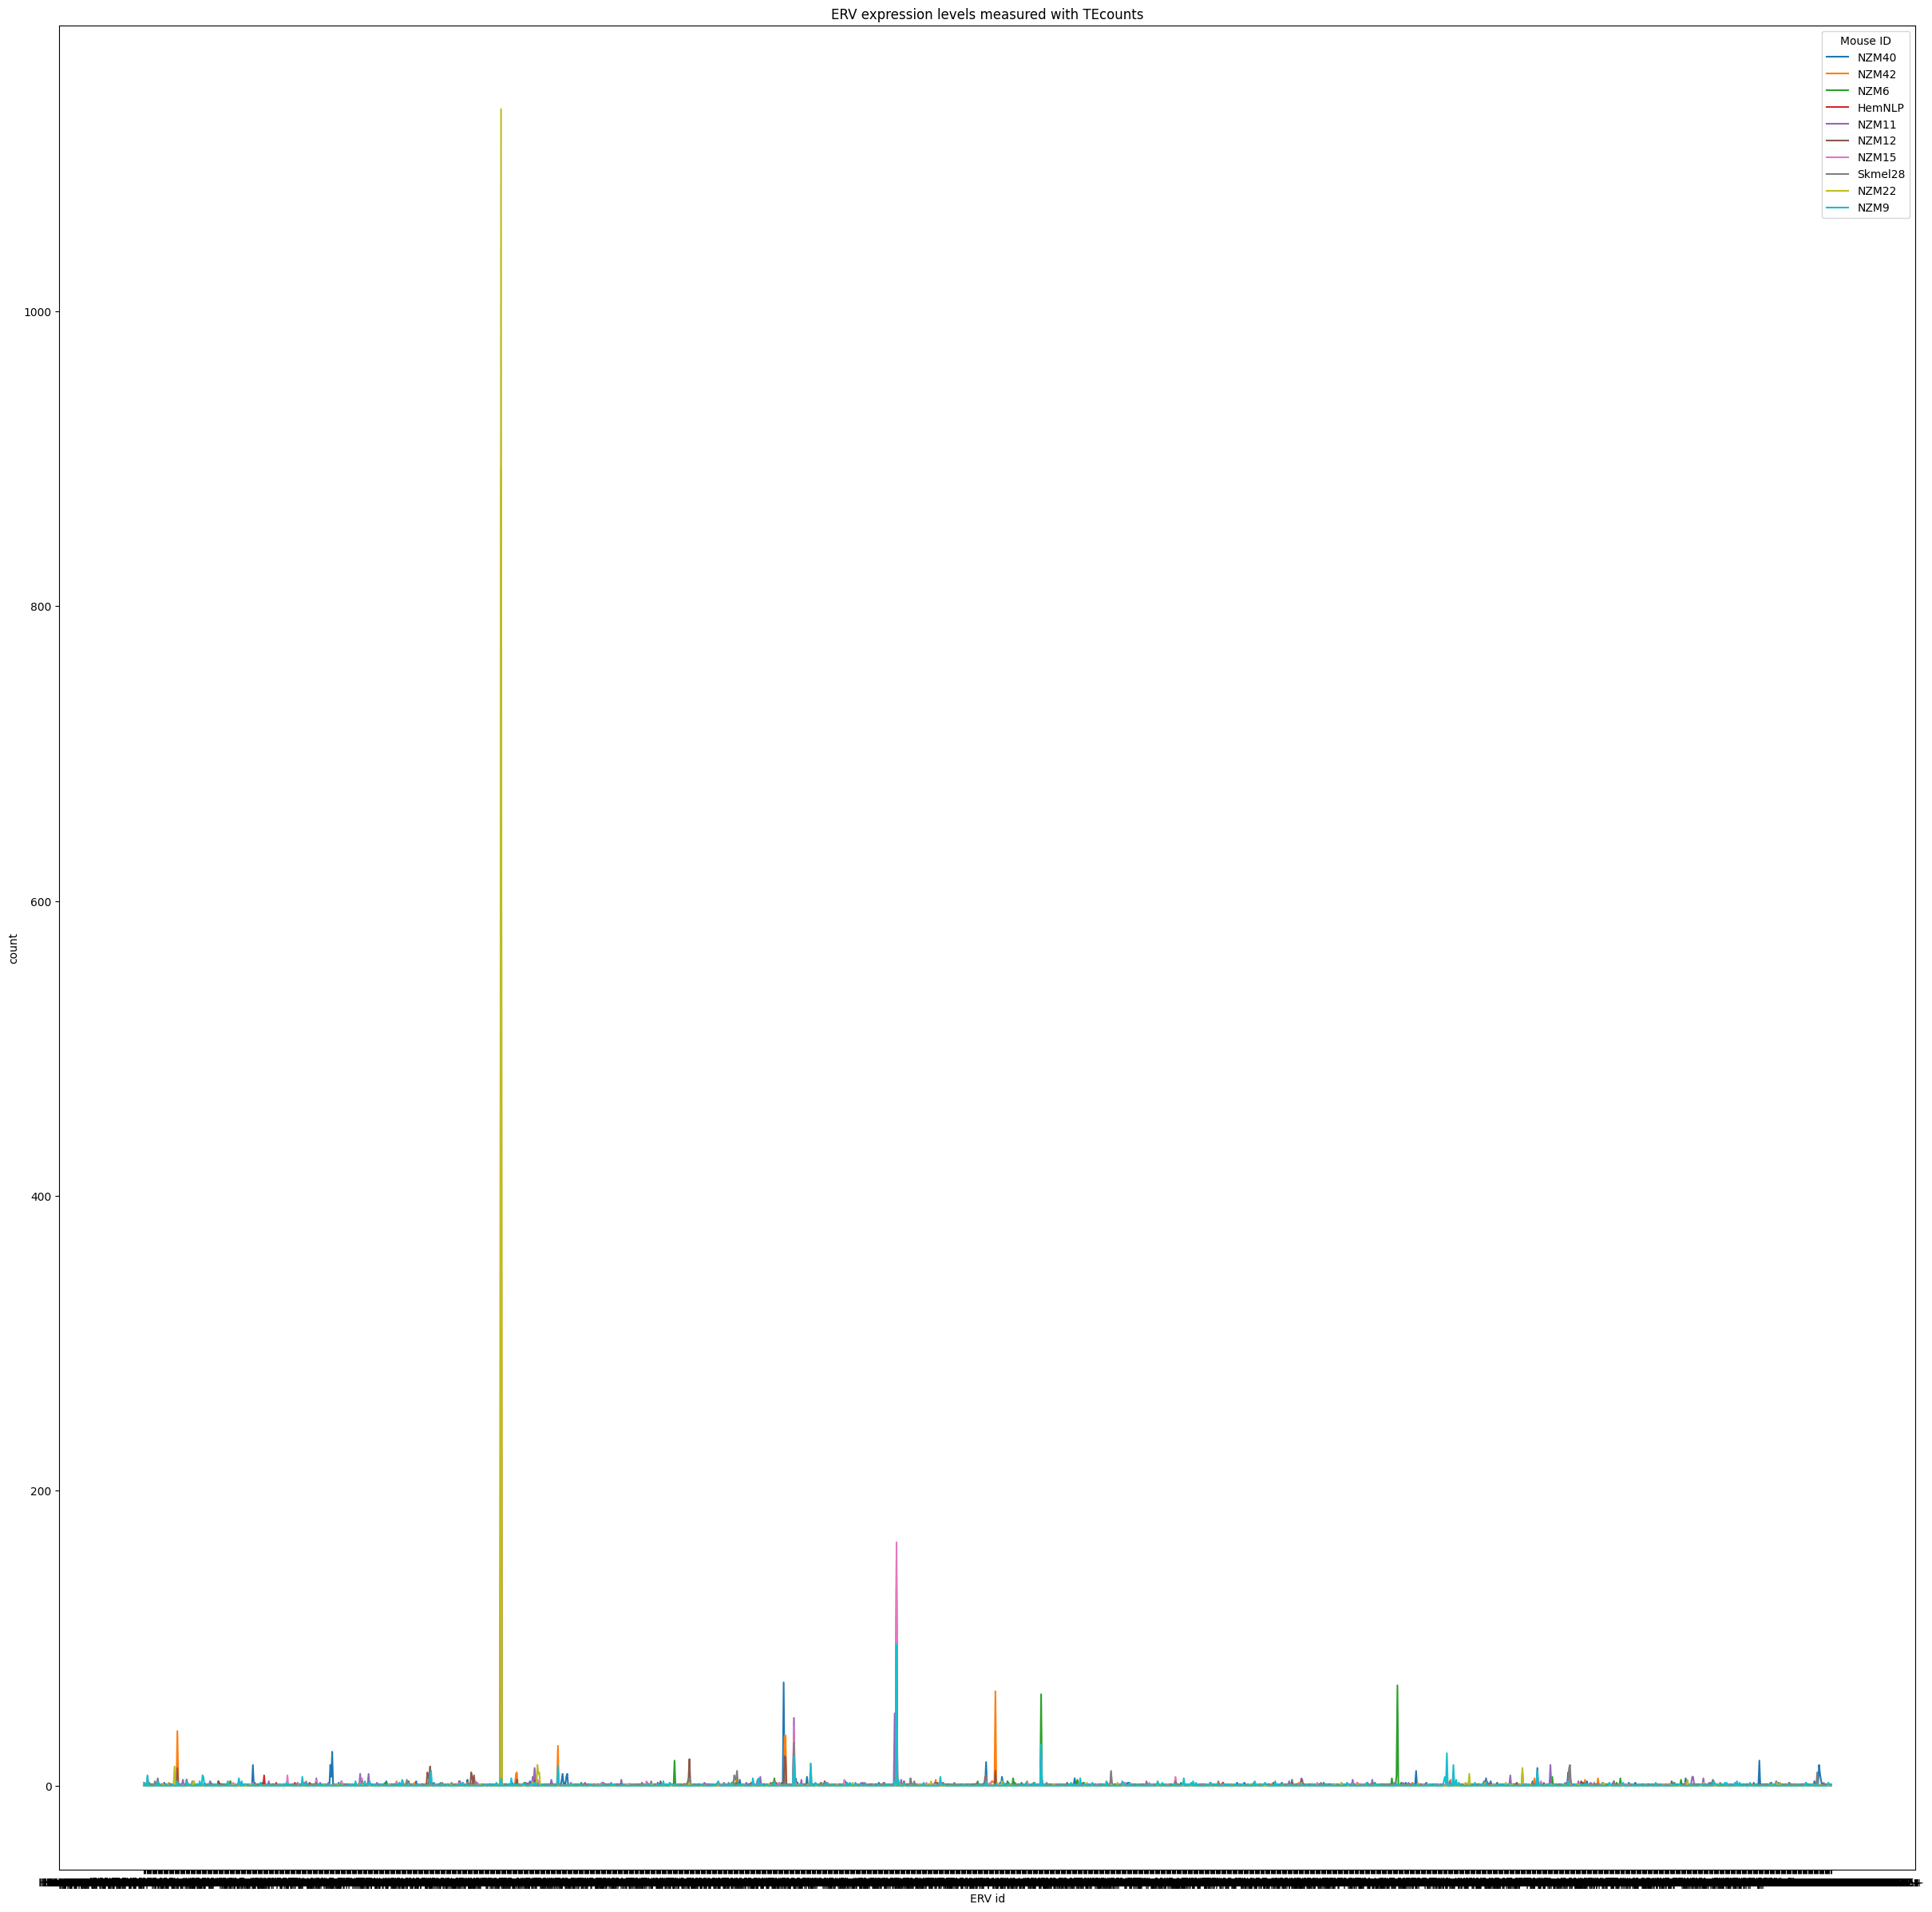

In [24]:
# plot_type 'line; or 'scatter'
visualise_ERV_expression(reshaped, 'line')

In [25]:
coloring = {
    'invasive' : 'red',
    'non-invasive' : 'blue',
    'normal' : 'yellow'

}
palette = {patient_id: coloring[phenotype] for patient_id, phenotype in patient2phenotype.items()}
print(palette)

{'1': 'red', '2': 'red', '3': 'red', '4': 'blue', '5': 'blue', '6': 'red', '7': 'red', '8': 'blue', '9': 'blue', '10': 'yellow'}


In [26]:


def visualise_ERV_expression_gropus(df, plot_type, palette, threshold = False ):
    plt.figure(figsize=(30, 30)) 
    
    print(palette)

    if plot_type == 'scatter':
        sns.scatterplot(data=df, x='gene_id', y='count', hue='patient_id', palette = palette) #s=4
    if plot_type == 'line':
        sns.lineplot(data=df, x='gene_id', y='count', hue='patient_id', palette = palette)
    
    plt.xlabel('ERV id')
    plt.ylabel('count')

    plt.title('ERV expression levels measured with TEtranscripts')

    # Adding legend
    plt.legend(title='Mouse ID', loc='upper right')

    if threshold == True:
        plt.xticks(rotation=90)
    plt.savefig('TEcounts_NZM_groupped.jpg')
    plt.show()    

{'1': 'red', '2': 'red', '3': 'red', '4': 'blue', '5': 'blue', '6': 'red', '7': 'red', '8': 'blue', '9': 'blue', '10': 'yellow'}


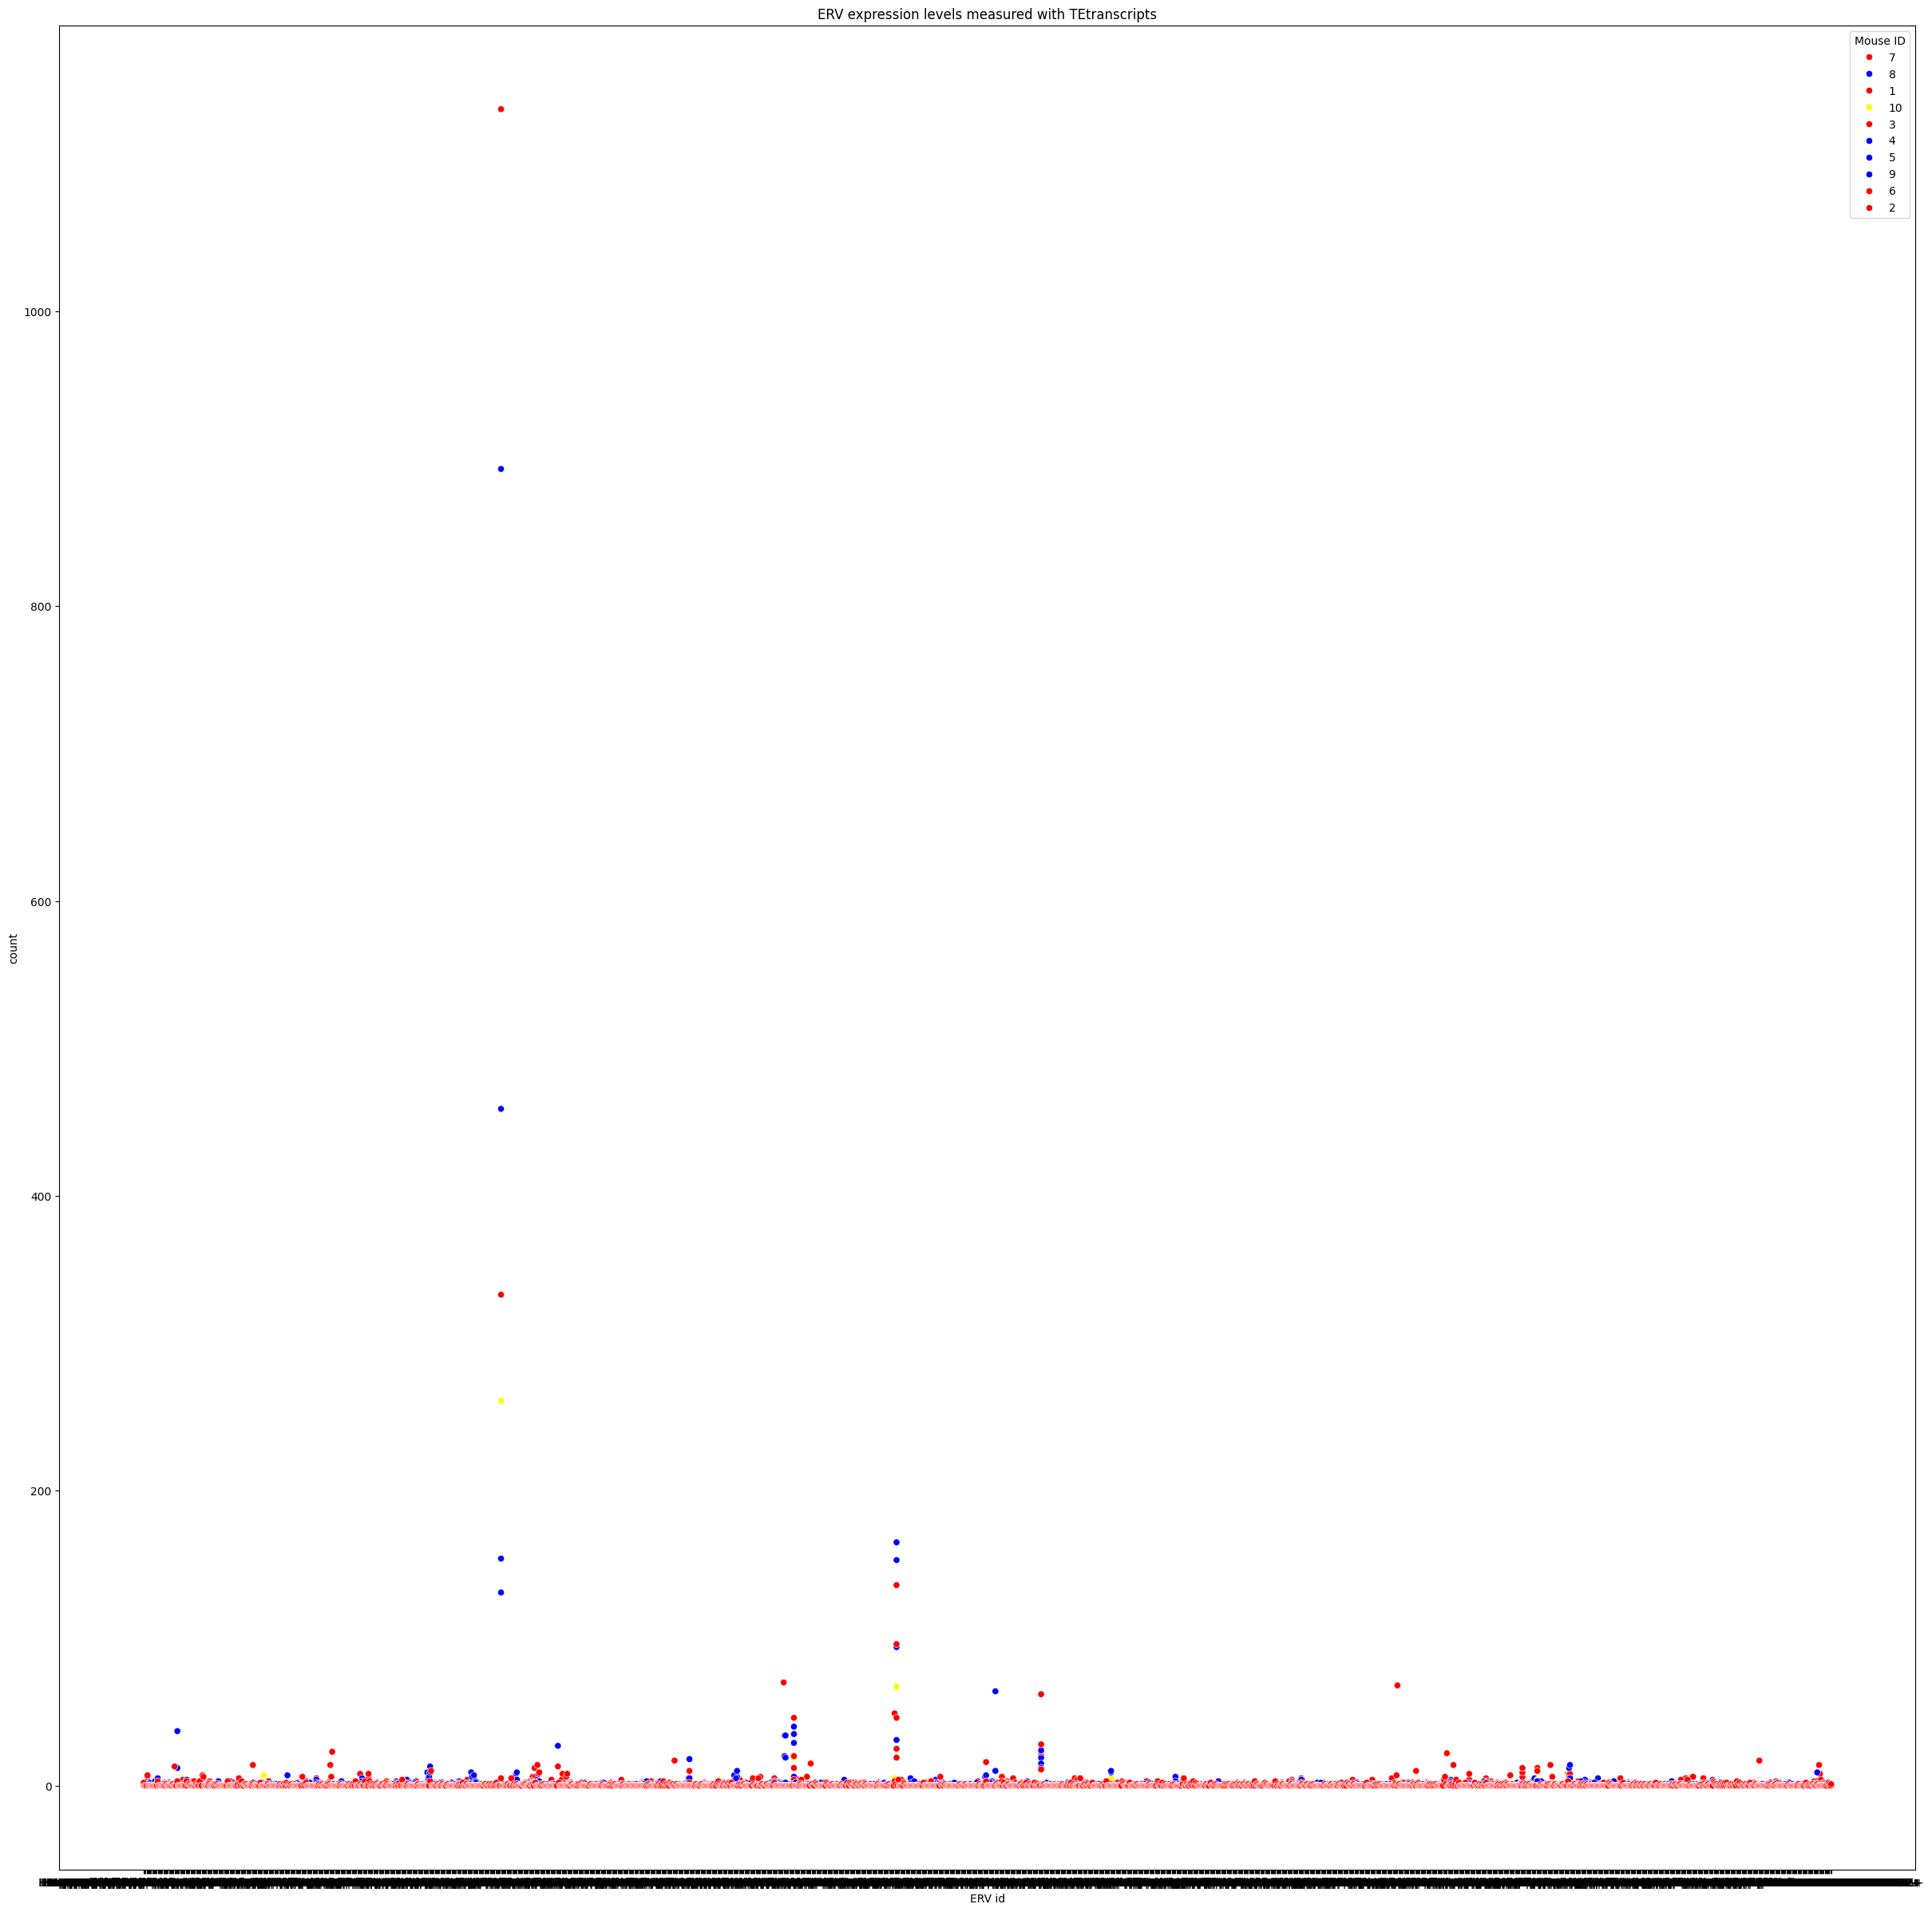

In [28]:
visualise_ERV_expression_gropus(reshaped, 'scatter', palette, threshold = 50)
#red invasive blue non-invasive yellow normal

In [26]:
#relate the data to normal as a background to see if that changes anything
#check this highly expressed ERV
#

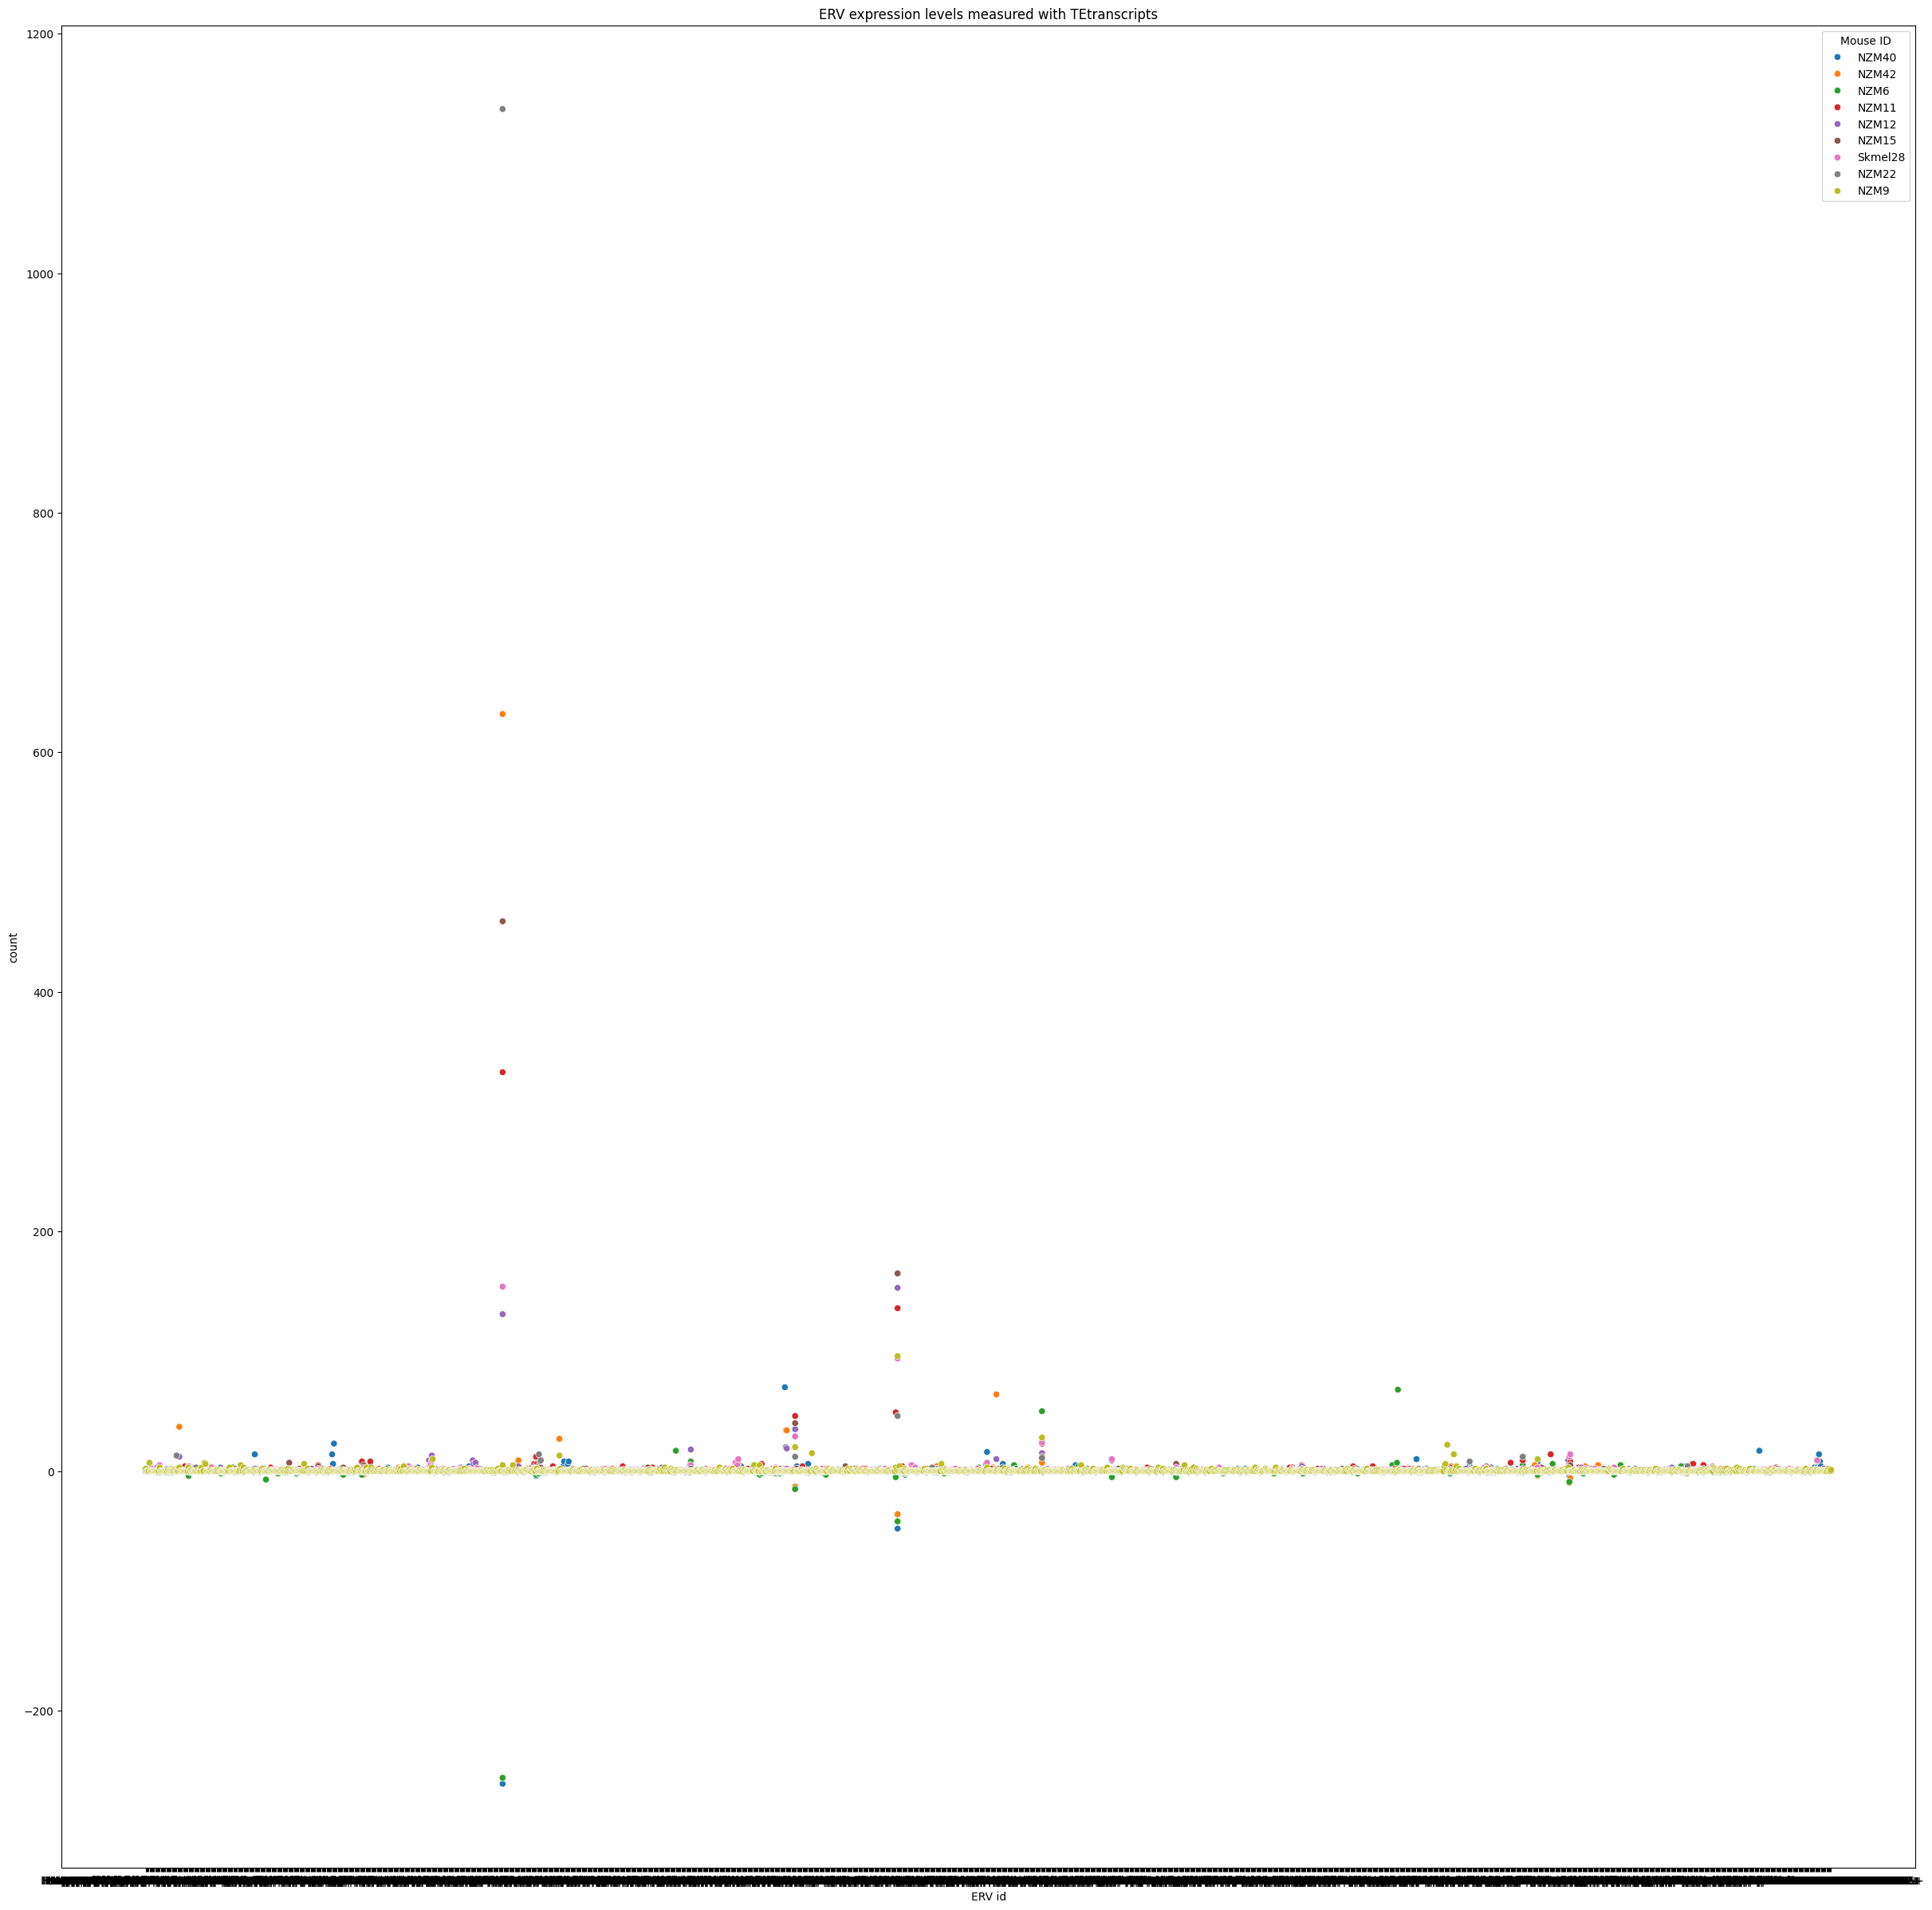

In [61]:
reshaped_wo_backg = reshape_dataframe(NZM_wo_background)
reshaped_wo_backg['patient_id'] = reshaped_wo_backg['patient_id'].astype(str)
reshaped_wo_backg['cell_line'] = reshaped_wo_backg['patient_id'].map(patient2cellline)

visualise_ERV_expression(reshaped_wo_backg, 'scatter')
#visualise_ERV_expression_gropus(reshaped_wo_backg, 'scatter', palette)